In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import dataloader
import modules 
import plots
from trainer import Trainer
import torch 
import matplotlib.pyplot as plt
from matplotlib_style import setup_matplotlib_environment, theme_categorical_bright

In [5]:
setup_matplotlib_environment()

# Test on Kaggle Housing Dataset

In [6]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(dataloader.KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

def k_fold(trainer, data, network_architecture, k, lr):
    models, data_folds = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = modules.LinearReLUMLP(network_architecture, learning_rate=0.01)
        trainer.fit(model, data_fold)
        models.append(model)
        data_folds.append(data_fold)
    return models, data_folds

In [7]:
data = dataloader.KaggleHouse(batch_size=64, )
data.preprocess()

In [8]:
network_architecture = [32, 32]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.01)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [9]:
trainer = Trainer(max_epochs=50)
trainer.fit(model, data)

Model running on cpu

 EPOCH 

Epoch 1/50, Training Loss: 35.0240

 EPOCH 

Epoch 2/50, Training Loss: 1.4317

 EPOCH 

Epoch 3/50, Training Loss: 0.2795

 EPOCH 

Epoch 4/50, Training Loss: 0.0602

 EPOCH 

Epoch 5/50, Training Loss: 0.0305

 EPOCH 

Epoch 6/50, Training Loss: 0.0207

 EPOCH 

Epoch 7/50, Training Loss: 0.0180

 EPOCH 

Epoch 8/50, Training Loss: 0.0160

 EPOCH 

Epoch 9/50, Training Loss: 0.0147

 EPOCH 

Epoch 10/50, Training Loss: 0.0131

 EPOCH 

Epoch 11/50, Training Loss: 0.0128

 EPOCH 

Epoch 12/50, Training Loss: 0.0128

 EPOCH 

Epoch 13/50, Training Loss: 0.0118

 EPOCH 

Epoch 14/50, Training Loss: 0.0115

 EPOCH 

Epoch 15/50, Training Loss: 0.0111

 EPOCH 

Epoch 16/50, Training Loss: 0.0116

 EPOCH 

Epoch 17/50, Training Loss: 0.0110

 EPOCH 

Epoch 18/50, Training Loss: 0.0115

 EPOCH 

Epoch 19/50, Training Loss: 0.0116

 EPOCH 

Epoch 20/50, Training Loss: 0.0130

 EPOCH 

Epoch 21/50, Training Loss: 0.0124

 EPOCH 

Epoch 22/50, Training Loss: 0.01

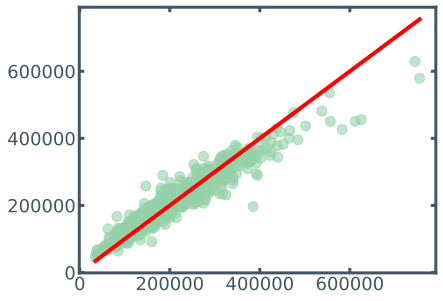

In [10]:

y = torch.tensor(data.train["SalePrice"].values.astype(float), dtype=torch.float32)
y_hat = torch.exp(model(torch.tensor(data.train.drop(columns="SalePrice").values.astype(float), dtype=torch.float32)))

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.scatter(y.detach().numpy(), y_hat.detach().numpy(), alpha=0.6, label='Predicted')

# add a line
ax.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Real')


In [11]:
models, data_folds = k_fold(trainer, data, network_architecture=[32, 32], k=5, lr=0.1)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model running on cpu

 EPOCH 

Epoch 1/50, Training Loss: 46.8445
Epoch 1/50, Validation Loss: 5.9579

 EPOCH 

Epoch 2/50, Training Loss: 3.3188
Epoch 2/50, Validation Loss: 0.3641

 EPOCH 

Epoch 3/50, Training Loss: 0.4616
Epoch 3/50, Validation Loss: 0.1404

 EPOCH 

Epoch 4/50, Training Loss: 0.1319
Epoch 4/50, Validation Loss: 0.0881

 EPOCH 

Epoch 5/50, Training Loss: 0.0503
Epoch 5/50, Validation Loss: 0.0356

 EPOCH 

Epoch 6/50, Training Loss: 0.0298
Epoch 6/50, Validation Loss: 0.0306

 EPOCH 

Epoch 7/50, Training Loss: 0.0246
Epoch 7/50, Validation Loss: 0.0236

 EPOCH 

Epoch 8/50, Training Loss: 0.0205
Epoch 8/50, Validation Loss: 0.0221

 EPOCH 

Epoch 9/50, Training Loss: 0.0183
Epoch 9/50, Validation Loss: 0.0215

 EPOCH 

Epoch 10/50, Training Loss: 0.0160
Epoch 10/50, Validation Loss: 0.0192

 EPOCH 

Epoch 11/50, Training Loss: 0.0152
Epoch 11/50, Validation Loss: 0.0211

 EPOCH 

Epoch 12/50, Training Loss: 0.0134
Epoch 12/50, Validation Loss: 0.0170

 EPOCH 

Ep

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 3/50, Training Loss: 0.7851
Epoch 3/50, Validation Loss: 0.1241

 EPOCH 

Epoch 4/50, Training Loss: 0.1838
Epoch 4/50, Validation Loss: 0.1183

 EPOCH 

Epoch 5/50, Training Loss: 0.0637
Epoch 5/50, Validation Loss: 0.0480

 EPOCH 

Epoch 6/50, Training Loss: 0.0328
Epoch 6/50, Validation Loss: 0.0392

 EPOCH 

Epoch 7/50, Training Loss: 0.0239
Epoch 7/50, Validation Loss: 0.0332

 EPOCH 

Epoch 8/50, Training Loss: 0.0191
Epoch 8/50, Validation Loss: 0.0317

 EPOCH 

Epoch 9/50, Training Loss: 0.0161
Epoch 9/50, Validation Loss: 0.0299

 EPOCH 

Epoch 10/50, Training Loss: 0.0151
Epoch 10/50, Validation Loss: 0.0293

 EPOCH 

Epoch 11/50, Training Loss: 0.0134
Epoch 11/50, Validation Loss: 0.0282

 EPOCH 

Epoch 12/50, Training Loss: 0.0124
Epoch 12/50, Validation Loss: 0.0282

 EPOCH 

Epoch 13/50, Training Loss: 0.0122
Epoch 13/50, Validation Loss: 0.0281

 EPOCH 

Epoch 14/50, Training Loss: 0.0123
Epoch 14/50, Validation Loss: 0.0274

 EPOCH 

Epoch 15/50, Training Loss: 0.

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 2/50, Training Loss: 3.8209
Epoch 2/50, Validation Loss: 1.8758

 EPOCH 

Epoch 3/50, Training Loss: 0.5778
Epoch 3/50, Validation Loss: 0.2916

 EPOCH 

Epoch 4/50, Training Loss: 0.1127
Epoch 4/50, Validation Loss: 0.0575

 EPOCH 

Epoch 5/50, Training Loss: 0.0475
Epoch 5/50, Validation Loss: 0.0358

 EPOCH 

Epoch 6/50, Training Loss: 0.0261
Epoch 6/50, Validation Loss: 0.0292

 EPOCH 

Epoch 7/50, Training Loss: 0.0199
Epoch 7/50, Validation Loss: 0.0255

 EPOCH 

Epoch 8/50, Training Loss: 0.0176
Epoch 8/50, Validation Loss: 0.0238

 EPOCH 

Epoch 9/50, Training Loss: 0.0160
Epoch 9/50, Validation Loss: 0.0231

 EPOCH 

Epoch 10/50, Training Loss: 0.0142
Epoch 10/50, Validation Loss: 0.0208

 EPOCH 

Epoch 11/50, Training Loss: 0.0129
Epoch 11/50, Validation Loss: 0.0213

 EPOCH 

Epoch 12/50, Training Loss: 0.0116
Epoch 12/50, Validation Loss: 0.0220

 EPOCH 

Epoch 13/50, Training Loss: 0.0113
Epoch 13/50, Validation Loss: 0.0214

 EPOCH 

Epoch 14/50, Training Loss: 0.01

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 1/50, Training Loss: 47.4306
Epoch 1/50, Validation Loss: 3.7183

 EPOCH 

Epoch 2/50, Training Loss: 3.6978
Epoch 2/50, Validation Loss: 0.1157

 EPOCH 

Epoch 3/50, Training Loss: 0.4578
Epoch 3/50, Validation Loss: 0.0611

 EPOCH 

Epoch 4/50, Training Loss: 0.1020
Epoch 4/50, Validation Loss: 0.0491

 EPOCH 

Epoch 5/50, Training Loss: 0.0503
Epoch 5/50, Validation Loss: 0.0414

 EPOCH 

Epoch 6/50, Training Loss: 0.0321
Epoch 6/50, Validation Loss: 0.0266

 EPOCH 

Epoch 7/50, Training Loss: 0.0243
Epoch 7/50, Validation Loss: 0.0264

 EPOCH 

Epoch 8/50, Training Loss: 0.0218
Epoch 8/50, Validation Loss: 0.0245

 EPOCH 

Epoch 9/50, Training Loss: 0.0190
Epoch 9/50, Validation Loss: 0.0207

 EPOCH 

Epoch 10/50, Training Loss: 0.0179
Epoch 10/50, Validation Loss: 0.0188

 EPOCH 

Epoch 11/50, Training Loss: 0.0161
Epoch 11/50, Validation Loss: 0.0184

 EPOCH 

Epoch 12/50, Training Loss: 0.0150
Epoch 12/50, Validation Loss: 0.0163

 EPOCH 

Epoch 13/50, Training Loss: 0.013

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 4/50, Training Loss: 0.1366
Epoch 4/50, Validation Loss: 0.1537

 EPOCH 

Epoch 5/50, Training Loss: 0.0522
Epoch 5/50, Validation Loss: 0.0825

 EPOCH 

Epoch 6/50, Training Loss: 0.0372
Epoch 6/50, Validation Loss: 0.0812

 EPOCH 

Epoch 7/50, Training Loss: 0.0255
Epoch 7/50, Validation Loss: 0.0622

 EPOCH 

Epoch 8/50, Training Loss: 0.0220
Epoch 8/50, Validation Loss: 0.0542

 EPOCH 

Epoch 9/50, Training Loss: 0.0194
Epoch 9/50, Validation Loss: 0.0572

 EPOCH 

Epoch 10/50, Training Loss: 0.0172
Epoch 10/50, Validation Loss: 0.0483

 EPOCH 

Epoch 11/50, Training Loss: 0.0156
Epoch 11/50, Validation Loss: 0.0463

 EPOCH 

Epoch 12/50, Training Loss: 0.0147
Epoch 12/50, Validation Loss: 0.0418

 EPOCH 

Epoch 13/50, Training Loss: 0.0142
Epoch 13/50, Validation Loss: 0.0455

 EPOCH 

Epoch 14/50, Training Loss: 0.0132
Epoch 14/50, Validation Loss: 0.0444

 EPOCH 

Epoch 15/50, Training Loss: 0.0129
Epoch 15/50, Validation Loss: 0.0422

 EPOCH 

Epoch 16/50, Training Loss: 

In [12]:
k_fold_y = []
k_fold_y_hat = []

for i, (model, data_fold) in enumerate(zip(models, data_folds)):
    y = torch.tensor(data_fold.val["SalePrice"].values.astype(float), dtype=torch.float32)
    y_hat = torch.exp(model(torch.tensor(data_fold.val.drop(columns="SalePrice").values.astype(float), dtype=torch.float32)))

    k_fold_y.append(y.detach().numpy())
    k_fold_y_hat.append(y_hat.detach().numpy())

In [13]:
print(len(k_fold_y), len(k_fold_y_hat))

5 5


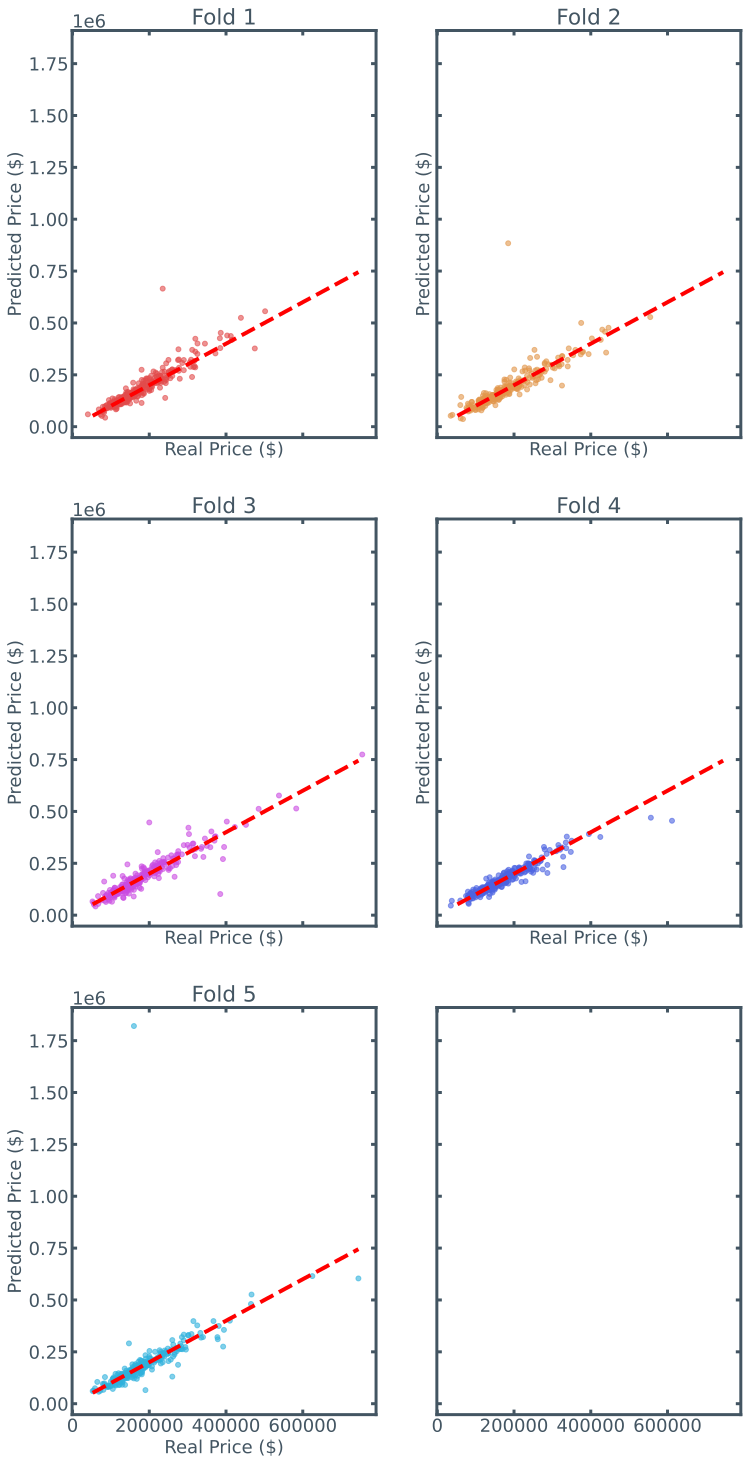

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=len(k_fold_y) // 2 + 1, figsize=(12, 5 * len(k_fold_y)), sharex=True, sharey=True)


for i, subplot_ax in zip(range(len(k_fold_y)), ax.ravel()):
    subplot_ax.scatter(k_fold_y[i], k_fold_y_hat[i], alpha=0.6, marker='.', c=theme_categorical_bright[i], label='Predicted')
    subplot_ax.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', label='Real')
    subplot_ax.set_title(f'Fold {i+1}')
    subplot_ax.set_ylabel('Predicted Price ($)')
    subplot_ax.set_xlabel('Real Price ($)')
# add a line
